# ÁîªÂÉèÁîüÊàê AI ÂÖ•ÈñÄ: Python „Å´„Çà„ÇãÊã°Êï£„É¢„Éá„É´„ÅÆÁêÜË´ñ„Å®ÂÆüË∑µ

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shunk031/coloso-python-diffusion-models/blob/main/lectures/section-07-20.ipynb)

## Section 07. Play with Diffusion Model

Stable Diffusion „Çí‰∏≠ÂøÉ„Å®„Åó„ÅüÊã°Êï£„É¢„Éá„É´„ÇíÁî®„ÅÑ„Å¶„ÄÅÊúÄÂÖàÁ´Ø„ÅÆÁîªÂÉèÁîüÊàêÊäÄË°ì„ÇíÂÆüÈöõ„Å´Âãï„Åã„Åó„Å¶ÂÆüË∑µ„Åó„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ

### Lecture 20. Textual Inversion

Textual Inversion [[Gal+ ICLR'23]](https://arxiv.org/abs/2208.01618) „ÇíÁî®„ÅÑ„Å¶ Stable Diffusion „Å´Êñ∞„Åó„ÅÑÊ¶ÇÂøµÔºà„Ç≥„É≥„Çª„Éó„Éà; conceptÔºâ„Çí„ÄåÊïô„Åà„Çã„ÄçÊñπÊ≥ï„ÇíÁ¥π‰ªã„Åó„Åæ„Åô„ÄÇ

## „Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó

### GPU „Åå‰ΩøÁî®„Åß„Åç„Çã„ÅãÁ¢∫Ë™ç

Êú¨ Colab „Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÇíÂÆüË°å„Åô„Çã„Åü„ÇÅ„Å´ GPU „É©„É≥„Çø„Ç§„É†„Çí‰ΩøÁî®„Åó„Å¶„ÅÑ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åô„ÄÇCPU „É©„É≥„Çø„Ç§„É†„Å®ÊØî„Åπ„Å¶ÁîªÂÉèÁîüÊàê„Åå„Çà„ÇäÊó©„Åè„Å™„Çä„Åæ„Åô„ÄÇ‰ª•‰∏ã„ÅÆ `nvidia-smi` „Ç≥„Éû„É≥„Éâ„ÅåÂ§±Êïó„Åô„ÇãÂ†¥Âêà„ÅØÂÜçÂ∫¶Ë¨õÁæ©Ë≥áÊñô„ÅÆ `GPU ‰ΩøÁî®Ë®≠ÂÆö` „ÅÆ„Çπ„É©„Ç§„ÉâË™¨Êòé„ÇÑ Google Colab „ÅÆ [FAQ](https://research.google.com/colaboratory/faq.html#gpu-utilization) Á≠â„ÇíÂèÇËÄÉ„Å´„É©„É≥„Çø„Ç§„É†„Çø„Ç§„Éó„ÅåÊ≠£„Åó„ÅèÂ§âÊõ¥„Åï„Çå„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™ç„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

In [ ]:
!nvidia-smi

Tue Jul  4 12:49:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Âà©Áî®„Åô„Çã Python „É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Çπ„Éà„Éº„É´

diffusers „É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Çπ„Éà„Éº„É´„Åô„Çã„Åì„Å®„ÅßÊã°Êï£„É¢„Éá„É´„ÇíÁ∞°Âçò„Å´‰ΩøÁî®„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åó„Åæ„Åô„ÄÇdiffusers „É©„Ç§„Éñ„É©„É™„ÇíÂãï„Åã„Åô‰∏ä„ÅßÂøÖË¶Å„Å®„Å™„Çã„É©„Ç§„Éñ„É©„É™„ÇÇËøΩÂä†„Åß„Ç§„É≥„Çπ„Éà„Éº„É´„Åó„Åæ„Åô:
  - [transformers](https://github.com/huggingface/transformers): Êã°Êï£„É¢„Éá„É´„Å´„Åä„ÅÑ„Å¶Ê†∏„Å®„Å™„Çã Transformer „É¢„Éá„É´„ÅåÂÆöÁæ©„Åï„Çå„Å¶„ÅÑ„Çã„É©„Ç§„Éñ„É©„É™
  - [accelerate](https://github.com/huggingface/accelerate): transformers „Å®ÈÄ£Êê∫„Åó„Å¶„Çà„ÇäÈ´òÈÄü„Å™ÁîªÂÉèÁîüÊàê„Çí„Çµ„Éù„Éº„Éà„Åô„Çã„É©„Ç§„Éñ„É©„É™

In [ ]:
!pip install diffusers==0.16.1
!pip install transformers accelerate

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 934.9/934.9 kB 17.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 236.8/236.8 kB 31.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.2/7.2 MB 63.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 227.6/227.6 kB 30.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 91.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 75.6 MB/s eta 0:00:00


## Textual Inversion

Êú¨„Çª„ÇØ„Ç∑„Éß„É≥„Åß„ÅØ [`Textual-inversion fine-tuning for Stable Diffusion using düß®ffusers`](https://github.com/huggingface/notebooks/blob/main/diffusers/sd_textual_inversion_training.ipynb) „ÇíÂèÇËÄÉ„Å´„ÄÅtextual inversion „ÅÆÂãï‰Ωú„ÇíËøΩ„Å£„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ

„Åæ„ÅöÊ∫ñÂÇô„Å®„Åó„Å¶ÁîªÂÉè„ÇíË§áÊï∞ÁîüÊàê„Åó„ÅüÂ†¥Âêà„Å´ÁµêÊûú„ÇíÁ¢∫Ë™ç„Åó„ÇÑ„Åô„ÅÑ„Çà„ÅÜ„Å´„ÄÅÁîªÂÉè„Çí„Ç∞„É™„ÉÉ„Éâ‰∏ä„Å´Ë°®Á§∫„Åô„ÇãÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ„Åì„ÅÆÈñ¢Êï∞„ÅØ [ü§ó Hugging Face Stable Diffusion](https://huggingface.co/blog/stable_diffusion) „ÅÆ„Éñ„É≠„Ç∞Ë®ò‰∫ã„ÅÆ„ÇÇ„ÅÆ„ÇíÂà©Áî®„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
from typing import List
from PIL import Image
from PIL.Image import Image as PilImage

def image_grid(imgs: List[PilImage], rows: int, cols: int) -> PilImage:
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

### Êñ∞„Åü„Å™Ê¶ÇÂøµ„Çí„É¢„Éá„É´„Å´Êïô„Åà„Çã„Åü„ÇÅ„ÅÆË®≠ÂÆö

‰ΩøÁî®„Åô„Çã‰∫ãÂâçÂ≠¶ÁøíÊ∏à„ÅøÊã°Êï£„É¢„Éá„É´„ÇíÊåáÂÆö„Åó„Åæ„Åô„ÄÇ‰ªäÂõû„ÅØ [`runwayml/stable-diffusion-v1-5`](https://huggingface.co/runwayml/stable-diffusion-v1-5) „ÇíÈÅ∏Êäû„Åó„Åæ„Åó„Åü„ÄÇ

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"

Google drive „Å´„Éá„Éº„Çø„Çí‰øùÂ≠ò„Åô„ÇãË®≠ÂÆö„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ`File` „Çø„Éñ„Åã„Çâ google drive „Å´Áî®ÊÑè„Åó„ÅüÁîªÂÉè„ÇíË™≠„ÅøËæº„ÇÄ„Åì„Å®„ÇÇÂèØËÉΩ„Åß„Åô„Åå„ÄÅ‰ªäÂõû„ÅØ google drive „Çí„Éû„Ç¶„É≥„Éà„Åó„ÄÅ„Åù„Åì„Åã„Çâ drive ‰∏ä„Å´‰øùÂ≠ò„Åó„ÅüÁîªÂÉè„ÇíË™≠„ÅøËæº„ÇÄÊñπÊ≥ï„ÇíÊ§úË®é„Åó„Åæ„Åô„ÄÇ

In [ ]:
import os
from google.colab import drive

# /content/drive „Çí„Éû„Ç¶„É≥„Éà„Åô„Çã
DRIVE_PATH = os.path.join(os.sep, "content", "drive")
print(f"Mount the following directories: {DRIVE_PATH}")

drive.mount(DRIVE_PATH)

#
# Êú¨ notebook Áî®„ÅÆ„Éá„Éº„Çø„ÇíÊ†ºÁ¥ç„Åô„Çã„Éá„Ç£„É¨„ÇØ„Éà„É™„Çí‰ΩúÊàê„Åô„Çã
# „Åæ„Åö„Éô„Éº„Çπ„Å®„Å™„Çã„Éá„Ç£„É¨„ÇØ„Éà„É™„Å®„Åó„Å¶‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å™„Éá„Ç£„É¨„ÇØ„É™„Çí‰ΩúÊàê„Åô„Çã:
# /content/drive/MyDrive/colab-notebooks/oloso/practice
#
base_dir_path = os.path.join(DRIVE_PATH, "MyDrive", "colab-notebooks", "coloso", "practice")
#
# Ê¨°„Å´Ë¨õÁæ©Áî®„ÅÆ„Éá„Ç£„É¨„ÇØ„Éà„É™„Çí‰ΩúÊàê„Åô„Çã„ÄÇ‰ªäÂõû„ÅØÁ¨¨ 20 Ë¨õ„Å™„ÅÆ„Åß `lecture-20` „Å®ÂëΩÂêç„Åô„Çã:
# /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20
#
lecture_dir_path = os.path.join(base_dir_path, "lecture-20")

#
# ‰ªäÂõû‰ΩøÁî®„Åô„ÇãÂ≠¶ÁøíÁîªÂÉè„Çí‰øùÂ≠ò„Åô„Çã„Éá„Ç£„É¨„ÇØ„Éà„É™„Çí‰ΩúÊàê„Åô„Çã:
# /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sample-images
#
sample_image_dir_path = os.path.join(lecture_dir_path, "sample-images")
print(f"The images will be saved in the following path: {sample_image_dir_path}")

# ‰∏äË®ò„ÅÆ„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅåÂ≠òÂú®„Åó„Å™„ÅÑÂ†¥Âêà„ÅØ‰ΩúÊàê„Åô„Çã
if not os.path.exists(sample_image_dir_path):
    os.makedirs(sample_image_dir_path)

Mount the following directories: /content/drive
Mounted at /content/drive
The images will be saved in the following path: /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sample-images


Â≠¶Áøí„Å´‰ΩøÁî®„Åô„Çã„Éá„Éº„Çø„ÇíÁî®ÊÑè„Åó„Åæ„Åô„ÄÇ‰ªäÂõû„ÅØ textual inversion „Å´„ÇÇÁôªÂ†¥„Åó„Å¶„ÅÑ„ÇãÁå´„ÅÆ„Åä„ÇÇ„Å°„ÇÉ„Çí [huggingface dataset](https://huggingface.co/datasets/diffusers/cat_toy_example) ‰∏ä„Åã„Çâ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åó„Å¶„Åç„Åæ„Åô„ÄÇ„Åì„Åì„Åß„ÅØ„Åæ„Åö Colab ‰∏ä„Åß„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åó„Åü„ÅÆ„Å°„Å´„ÄÅgoogle drive „Å´‰øùÂ≠ò„Åô„ÇãÊñπÊ≥ï„ÇíÂèñ„Çä„Åæ„Åô„ÄÇ‰ª•‰∏ã„ÅÆ `urls` „Å´Â≠¶Áøí„Åó„Åü„ÅÑÊ¶ÇÂøµ„ÅÆÁîªÂÉè„ÅÆ URL „ÇíËøΩÂä†„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇtextual inversion „ÅØÊï∞Êûö„ÅÆÁîªÂÉè„ÅßÂ≠¶Áøí„ÅåÂèØËÉΩ„Åß„ÅÇ„Çã„Åü„ÇÅ„ÄÅ3 „Äú 5 Êûö„ÅßÂçÅÂàÜ„Åß„Åô„ÄÇ

In [ ]:
urls = [
    "https://huggingface.co/datasets/diffusers/cat_toy_example/resolve/main/1.jpeg",
    "https://huggingface.co/datasets/diffusers/cat_toy_example/resolve/main/2.jpeg",
    "https://huggingface.co/datasets/diffusers/cat_toy_example/resolve/main/3.jpeg",
    "https://huggingface.co/datasets/diffusers/cat_toy_example/resolve/main/4.jpeg",
    #
    # „Åì„Åì„Å´Êõ¥„Å´ÁîªÂÉè„ÇíËøΩÂä†„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô
    #
    # "https://huggingface.co/datasets/diffusers/cat_toy_example/resolve/main/5.jpeg",
    # "https://huggingface.co/datasets/diffusers/cat_toy_example/resolve/main/6.jpeg",
    # "https://huggingface.co/datasets/diffusers/cat_toy_example/resolve/main/7.jpeg",
]

„Ç™„É≥„É©„Ç§„É≥„Å´„ÅÇ„ÇãÁîªÂÉè„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åô„ÇãÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ„Åì„ÅÆÈñ¢Êï∞„Çí‰Ωø„Å£„Å¶‰∏äË®ò„ÅÆ `urls` „ÅßÊåáÂÆö„Åó„ÅüÁîªÂÉè„Çí„Ç§„É≥„Çø„Éº„Éç„ÉÉ„Éà‰∏ä„Åã„Çâ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åó„Åæ„Åô„ÄÇ

In [ ]:
import requests

def download_image(url: str) -> PilImage:
    return Image.open(requests.get(url, stream=True).raw)

for i, url in enumerate(urls):
    image = download_image(url)
    image_filepath = os.path.join(sample_image_dir_path, f"{i}.jpg")
    print(f"The image is saved in the following path: {image_filepath}")
    image.save(image_filepath)

The image is saved in the following path: /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sample-images/0.jpg
The image is saved in the following path: /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sample-images/1.jpg
The image is saved in the following path: /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sample-images/2.jpg
The image is saved in the following path: /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sample-images/3.jpg


Ê∫ñÂÇô„Åó„ÅüÁîªÂÉè„ÇíÁ¢∫Ë™ç„Åó„Å¶„Åø„Åæ„Åô„ÄÇ

In [ ]:
images: List[PilImage] = []
for file_path in os.listdir(sample_image_dir_path):
    image_filepath = os.path.join(sample_image_dir_path, file_path)
    image = Image.open(image_filepath)
    image = image.resize((512, 512))
    images.append(image)

image_grid(images, rows=1, cols=len(images))

Output hidden; open in https://colab.research.google.com to view.

Â≠¶Áøí„Åó„Åü„ÅÑÊ¶ÇÂøµ„Å´ÂØæ„Åô„Çã textual inversion „ÅÆË®≠ÂÆö„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ
- `what_to_teach` „Å´„ÅØÁîüÊàê„É¢„Éá„É´„Å´‰Ωï„ÇíÊïô„Åà„Çã„Åã„ÇíÊåáÂÆö„Åó„Åæ„Åô„ÄÇÊïô„Åà„ÇãÂØæË±°„Å®„Åó„Å¶`object` „Å®`style` „ÅåÈÅ∏ÊäûËÇ¢„Å®„Åó„Å¶„ÅÇ„Çä„Åæ„Åô„ÄÇ
- `placeholder_token` „Å´„ÅØÊñ∞„Åó„ÅÑÊ¶ÇÂøµ„ÇíË°®Áèæ„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åô„Çã„Éà„Éº„ÇØ„É≥„ÇíÊåáÂÆö„Åó„Åæ„Åô„ÄÇ„É¢„Éá„É´„Å´ÂÖ•Âäõ„Åô„Çã„Éó„É≠„É≥„Éó„Éà„ÇíÊåáÂÆö„Åô„ÇãÈöõ„ÅØ "ÈÅäÂúíÂú∞„ÅÆ `placeholder_token`" „ÅÆ„Çà„ÅÜ„Å´ÊåáÂÆö„Åó„Åæ„Åô„ÄÇ„Åì„ÅÆÁâπÂà•„Å™„Éà„Éº„ÇØ„É≥„ÅØ‰ªñ„ÅÆÂçòË™û„ÇÑ„Éà„Éº„ÇØ„É≥„Å®Âå∫Âà•„Åô„Çã„Åü„ÇÅ„Å´ËßíÊã¨Âºß„Çí‰ΩøÁî®„Åó„Å¶ÊåáÂÆö„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
- `initializer_token` „Å´„ÅØÊñ∞„Åó„ÅÑÊ¶ÇÂøµ„Åå‰Ωï„Åß„ÅÇ„Çã„Åã„ÇíË¶ÅÁ¥Ñ„Åô„ÇãÂçòË™û„ÇíÊåáÂÆö„Åó„Åæ„Åô„ÄÇ„Åì„ÅÆÂçòË™û„Åå `placeholder_token` „ÇíÂ≠¶Áøí„Åô„ÇãÂá∫Áô∫ÁÇπ„Å®„Å™„Çä„Åæ„Åô„ÄÇ„Åß„Åç„Çã„Å†„ÅëÈ°û‰ºº„Åô„ÇãÂçòË™û„ÇíÈÅ∏Êäû„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

In [ ]:
from typing import Literal, get_args

# „É¢„Éá„É´„Å´Êïô„Åà„ÇãÁâπÊÄß„ÅÆÈÅ∏ÊäûËÇ¢„ÇíÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ„Åì„Åì„Åß„ÅØ object „Å® style „ÅåÈÅ∏ÊäûÂèØËÉΩ
LearnableProperty = Literal["object", "style"]

# „É¢„Éá„É´„Å´‰Ωï„ÇíÊïô„Åà„Çã„Åã„ÇíÊåáÂÆö
what_to_teach = "object"

# Êñ∞„Åó„ÅÑÊ¶ÇÂøµ„ÇíË°®Áèæ„Åô„Çã„Åü„ÇÅ„Å´‰ΩøÁî®„Åô„Çã„Éà„Éº„ÇØ„É≥„ÇíÊåáÂÆö
placeholder_token = "<toy-cat>"

# Êñ∞„Åó„ÅÑÊ¶ÇÂøµ„Å´Èñ¢ÈÄ£„Åô„ÇãÂçòË™û„ÇíÊåáÂÆö
initializer_token = "toy" # ‰ªäÂõû„ÅÆÂ†¥Âêà„ÅØ cat „Åß„ÇÇ„ÅÑ„ÅÑ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì

# `what_to_teach` „ÇíÊ≠£„Åó„ÅèË®≠ÂÆö„Åß„Åç„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™ç„Åó„Åæ„Åô
if not what_to_teach in get_args(LearnableProperty):
    raise ValueError(
        f"Invalid learnable property: {what_to_teach}. "
        f"You should choose from the following options: {get_args(LearnableProperty)}."
    )

### Textual Inversion „Å´„Çà„ÇãÊñ∞„Åü„Å™Ê¶ÇÂøµ„ÅÆÂ≠¶Áøí

‰ª•‰∏ã„ÅÆ‰∏ÄÈÄ£„ÅÆ„Çª„É´„ÇíÂÆüË°å„Åó„Å¶Â≠¶Áøí„ÇíÈñãÂßã„Åï„Åõ„Åæ„Åô„ÄÇÂÖ®Â∑•Á®ã„Åß 1 „Äú 4 ÊôÇÈñìÁ®ãÂ∫¶„Åã„Åã„Çã„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ„Åæ„Åö„ÅØ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÂä†Â∑•„ÇíË°å„Å£„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ

Â≠¶ÁøíÁî®„ÅÆ„Éó„É≠„É≥„Éó„Éà„ÉÜ„É≥„Éó„É¨„Éº„Éà„ÇíÊ∫ñÂÇô„Åó„Åæ„Åô„ÄÇ„Åì„Çå„Çâ„ÅØ textual inversion „ÅÆË´ñÊñá [[Gal+ ICLR'23]](https://arxiv.org/abs/2208.01618) „ÇíÂèÇËÄÉ„Å´ÂÆöÁæ©„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
imagenet_templates_small = [
    "a photo of a {}",
    "a rendering of a {}",
    "a cropped photo of the {}",
    "the photo of a {}",
    "a photo of a clean {}",
    "a photo of a dirty {}",
    "a dark photo of the {}",
    "a photo of my {}",
    "a photo of the cool {}",
    "a close-up photo of a {}",
    "a bright photo of the {}",
    "a cropped photo of a {}",
    "a photo of the {}",
    "a good photo of the {}",
    "a photo of one {}",
    "a close-up photo of the {}",
    "a rendition of the {}",
    "a photo of the clean {}",
    "a rendition of a {}",
    "a photo of a nice {}",
    "a good photo of a {}",
    "a photo of the nice {}",
    "a photo of the small {}",
    "a photo of the weird {}",
    "a photo of the large {}",
    "a photo of a cool {}",
    "a photo of a small {}",
]

imagenet_style_templates_small = [
    "a painting in the style of {}",
    "a rendering in the style of {}",
    "a cropped painting in the style of {}",
    "the painting in the style of {}",
    "a clean painting in the style of {}",
    "a dirty painting in the style of {}",
    "a dark painting in the style of {}",
    "a picture in the style of {}",
    "a cool painting in the style of {}",
    "a close-up painting in the style of {}",
    "a bright painting in the style of {}",
    "a cropped painting in the style of {}",
    "a good painting in the style of {}",
    "a close-up painting in the style of {}",
    "a rendition in the style of {}",
    "a nice painting in the style of {}",
    "a small painting in the style of {}",
    "a weird painting in the style of {}",
    "a large painting in the style of {}",
]

Â≠¶Áøí„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø„Å®Âä†Â∑•„ÇíÊãÖ„ÅÜ `torch.utils.data.Dataset` „ÇØ„É©„Çπ„ÇíÂÖÉ„Å´„Åó„Åü `TextualInversionDataset` „ÇíÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ

In [ ]:
import PIL
import random

import numpy as np
import torch

from typing import TypedDict

from torch.utils.data import Dataset
from torchvision import transforms
from transformers.tokenization_utils import PreTrainedTokenizer

# ÁîªÂÉè„ÅÆÊã°Â§ßÁ∏ÆÂ∞èÊñπÊ≥ï„ÅÆÈÅ∏ÊäûËÇ¢„ÇíÂÆöÁæ©
InterpolationType = Literal["linear", "bilinear", "bicubic", "lanczos"]
INTERPOLATION = {
    "linear": PIL.Image.LINEAR,
    "bilinear": PIL.Image.BILINEAR,
    "bicubic": PIL.Image.BICUBIC,
    "lanczos": PIL.Image.LANCZOS,
}

#
# Âä†Â∑•„Åó„Åü„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíËæûÊõ∏Âûã„ÅÆ„Éá„Éº„Çø„Å´Âä†Â∑•„Åô„ÇãÈöõ„Å´
# key „ÅÆÂÆöÁæ©„Å®ÂØæÂøú„Åô„Çã value „ÅÆÂûã„Ç¢„Éé„ÉÜ„Éº„Ç∑„Éß„É≥„ÇíÂÆ£Ë®Ä
#
# ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆ£Ë®Ä„Åô„Çã„Åì„Å®„Åß„ÄÅÊÉ≥ÂÆö„Å®„ÅØÁï∞„Å™„Çã„Éá„Éº„Çø„Åå
# ÂÖ•„Å£„Å¶„Åç„ÅüÂ†¥Âêà„Å´„Ç®„É©„Éº„ÇíÂá∫„Åô„Åì„Å®„Åå„Åß„Åç„Çã
#
class Example(TypedDict):
    input_ids: torch.Tensor
    pixel_values: torch.Tensor

#
# Ë™≠„ÅøËæº„Çì„Å†„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÂä†Â∑•„Åô„Çã Dataset „ÇØ„É©„Çπ
#
class TextualInversionDataset(Dataset):
    def __init__(
        self,
        data_root: str,
        tokenizer: PreTrainedTokenizer,
        learnable_property: LearnableProperty,
        image_size: int = 512,
        repeats: int = 100,
        interpolation: InterpolationType = "bicubic",
        flip_proba: float = 0.5,
        split: str = "train",
        placeholder_token: str = "*",
        is_center_crop: bool = False,
    ) -> None:
        self.data_root = data_root
        self.tokenizer = tokenizer
        self.learnable_property = learnable_property
        self.image_size = image_size
        self.placeholder_token = placeholder_token
        self.is_center_crop = is_center_crop
        self.flip_proba = flip_proba

        self.image_paths = [
            os.path.join(self.data_root, file_path)
            for file_path in os.listdir(self.data_root)
        ]

        self.num_images = len(self.image_paths)
        self.dataset_length = (
            self.num_images * repeats
            if split == "train"
            else self.num_images
        )

        self.interpolation = INTERPOLATION[interpolation]

        self.templates = (
            imagenet_style_templates_small
            if learnable_property == "style"
            else imagenet_templates_small
        )

        self.flip_transform = transforms.RandomHorizontalFlip(self.flip_proba)

    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Example:
        # ÁîªÂÉè„ÅÆ„Éë„Çπ„Åã„ÇâÁîªÂÉè„ÇíË™≠„ÅøËæº„Åø
        image_pil = Image.open(self.image_paths[idx % self.num_images])

        if not image.mode == "RGB":
            image_pil = image_pil.convert("RGB")

        placeholder_string = self.placeholder_token
        # ‰∏äË®ò„ÅßÂÆöÁæ©„Åó„Åü„Éó„É≠„É≥„Éó„Éà„ÅÆ„ÉÜ„É≥„Éó„É¨„Éº„Éà„É™„Çπ„Éà„Åã„Çâ„É©„É≥„ÉÄ„É†„Å´
        # 1 „Å§Âèñ„Å£„Å¶„Åç„Å¶„ÄÅplaceholder_string „ÇíÂüã„ÇÅËæº„ÇÄ
        text = random.choice(self.templates).format(placeholder_string)

        # tokenizer „ÅßÊñáÁ´†„Çí„Éà„Éº„ÇØ„É≥Âàó„Å´Â§âÊèõ
        input_ids = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.tokenizer.model_max_length,
            return_tensors="pt"
        ).input_ids[0]

        image_arr = np.array(image_pil).astype(np.uint8)

        if self.is_center_crop:
            crop = min(*image_arr.shape)
            h, w, = (
                image_arr.shape[0],
                image_arr.shape[1],
            )
            image_arr = image_arr[
                (h - crop) // 2:(h + crop) // 2,
                (w - crop) // 2:(w + crop) // 2
            ]

        image_pil = Image.fromarray(image_arr)
        image_pil = image_pil.resize(
            (self.image_size, self.image_size),
            resample=self.interpolation
        )

        image_pil = self.flip_transform(image_pil)
        image_arr = np.array(image_pil).astype(np.uint8)
        image_arr = (image_arr / 127.5 - 1.0).astype(np.float32)

        pixel_values = torch.from_numpy(image_arr).permute(2, 0, 1)

        return {"input_ids": input_ids, "pixel_values": pixel_values}

„É¢„Éá„É´„Çí„Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó„Åó„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ„Åæ„Åö„ÅØÊñá„Çí„Éà„Éº„ÇØ„É≥„Å´ÂàÜÂâ≤„Åô„Çã `tokenizer` „ÇíË™≠„ÅøËæº„Åø„Åæ„Åô„ÄÇ„Åù„ÅÆÂæå `placeholder_token` „ÇíËøΩÂä†„ÅÆ special token „Å®„Åó„Å¶Ë®≠ÂÆö„Åó„Åæ„Åô„ÄÇ

In [ ]:
from transformers import CLIPTokenizer

# tokenizer „ÅÆË™≠„ÅøËæº„Åø
tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")

# `placeholder_token` „Å® tokenizer „Å´ËøΩÂä†
num_added_tokens = tokenizer.add_tokens(placeholder_token)

if num_added_tokens == 0:
    #
    # `placeholder_token` „ÅåÂÖÉ„ÄÖ `tokenizer` „Å´Âê´„Åæ„Çå„Å¶„ÅÑ„Åü„Çâ„Ç®„É©„Éº„ÇíÂá∫„Åô
    # „Ç®„É©„Éº„Å´„Å™„Å£„Åü„ÇâÈÅï„ÅÜ `placeholder_token` „ÇíÊåáÂÆö„Åô„Çã„Çà„ÅÜ„Å´„Åó„Å¶„Åè„Å†„Åï„ÅÑ
    #
    raise ValueError(
        f"The tokenizer already contains the token {placeholder_token}. ",
        "Please pass a difference `placeholder_token` that is not already in the tokenizer."
    )

`placeholder_token` „Å® `initializer_token` „ÅÆ„Éà„Éº„ÇØ„É≥ ID „ÇíÂèñÂæó„Åó„Åæ„Åô„ÄÇ`initializer_token` „ÅåÂçò‰∏Ä„ÅÆ„Éà„Éº„ÇØ„É≥„Åß„Å™„ÅÑÂ†¥Âêà„Å´„Ç®„É©„Éº„ÅåÂá∫„Åæ„Åô„ÄÇ

In [ ]:
token_ids = tokenizer.encode(initializer_token, add_special_tokens=False)
if len(token_ids) > 1:
    raise ValueError("The initializer token must be a single token.")

initializer_token_id = token_ids[0]
placeholder_token_id = tokenizer.convert_tokens_to_ids(placeholder_token)

Stable Diffusion „ÅßÂ≠¶Áøí„Åï„Çå„Åü„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„Çí„Åù„Çå„Åû„ÇåË™≠„ÅøËæº„Åø„Åæ„Åô„ÄÇ

In [ ]:
from diffusers import AutoencoderKL, UNet2DConditionModel
from transformers import CLIPTextModel

text_encoder = CLIPTextModel.from_pretrained(model_id, subfolder="text_encoder")
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")
unet = UNet2DConditionModel.from_pretrained(model_id, subfolder="unet")

`tokenizer` „Å´ `placeholder_token` „ÇíËøΩÂä†„Åó„Åü„Åü„ÇÅ„ÄÅ`text_encoder` „ÅåÊåÅ„Å§Âüã„ÇÅËæº„ÅøÂ±§„ÅÆ„Éë„É©„É°„Éº„Çø„ÇíÊã°Âºµ„Åó„Åæ„Åô„ÄÇ

In [ ]:
text_encoder.resize_token_embeddings(len(tokenizer))

Embedding(49409, 768)

‰∏äË®ò„ÅßÊã°Âºµ„Åó„Åü `placeholder_token` Áî®„ÅÆ„Éë„É©„É°„Éº„Çø„Çí„ÄÅ`initializer_token` „ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÂàùÊúüÂåñ„Åó„Åæ„Åô„ÄÇ

„Åì„ÅÜ„Åó„ÅüÊìç‰Ωú„ÇíË°å„ÅÜ„Åü„ÇÅ„ÄÅÊñ∞„Åü„Å´Â≠¶Áøí„Åï„Åõ„Åü„ÅÑÊ¶ÇÂøµ„Å®ÂØæÂøú„Åó„Å¶„ÅÑ„Çã `placeholder_token` „Å´Ëøë„ÅÑÊ¶ÇÂøµ„Çí `initializer_token` „Å´Ë®≠ÂÆö„Åó„Å¶„ÅÑ„Åü„Å†„Åç„Åü„ÅÑ„Åß„Åô„ÄÇ

In [ ]:
token_embeds = text_encoder.get_input_embeddings().weight.data
token_embeds[placeholder_token_id] = token_embeds[initializer_token_id]

Textual Inversion „Åß„ÅØ„ÄÅÊñ∞„Åó„ÅèËøΩÂä†„Åï„Çå„Åü„Éë„É©„É°„Éº„Çø„ÅÆ„Åø„ÇíÂ≠¶Áøí„Åï„Åõ„Åæ„Åô„ÄÇ‰ª•‰∏ã„Åß„ÅØ„Åù„Çå‰ª•Â§ñ„ÅÆ„Éë„É©„É°„Éº„Çø„ÇíÂõ∫ÂÆö (freeze) „Åï„Åõ„Åæ„Åô„ÄÇ

In [ ]:
import itertools
import torch.nn as nn

from typing import Iterable

def freeze_params(params: Iterable[nn.Parameter]) -> None:
    for param in params:
        param.requires_grad = False

# VAE „Å® U-Net „ÅÆ„Éë„É©„É°„Éº„Çø„ÇíÂõ∫ÂÆö
freeze_params(vae.parameters())
freeze_params(unet.parameters())

# Text Encoder „Å´„Åä„ÅÑ„Å¶„ÄÅËøΩÂä†„Åó„Åü„Éë„É©„É°„Éº„Çø‰ª•Â§ñ„ÇíÂõ∫ÂÆö
params_to_freeze = itertools.chain(
    text_encoder.text_model.encoder.parameters(),
    text_encoder.text_model.final_layer_norm.parameters(),
    text_encoder.text_model.embeddings.position_embedding.parameters(),
)
freeze_params(params_to_freeze)

Â≠¶ÁøíÁî®„Éá„Éº„Çø„Çí„ÄÅ‰∏äË®ò„ÅßÂÆöÁæ©„Åó„Åü `TextualInversionDataset` „ÇíÂÖÉ„Å´‰ΩúÊàê„Åó„Åæ„Åô„ÄÇ

In [ ]:
train_dataset = TextualInversionDataset(
    data_root=sample_image_dir_path,
    tokenizer=tokenizer,
    image_size=vae.config.sample_size,
    placeholder_token=placeholder_token,
    repeats=100,
    learnable_property=what_to_teach, # Â≠¶Áøí„Åï„Åõ„Åü„ÅÑÊ¶ÇÂøµ„ÅÆÁ®ÆÈ°ûÔºàobject/styleÔºâ„ÇíÊåáÂÆö
    is_center_crop=False,
    split="train",
)

Â≠¶ÁøíÊôÇ„Å´‰ªò‰∏é„Åô„Çã„Éé„Ç§„Ç∫„ÇíÂà∂Âæ°„Åô„Çã„Çπ„Ç±„Ç∏„É•„Éº„É©„ÇíÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ

In [ ]:
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler.from_pretrained(model_id, subfolder="scheduler")

Â≠¶Áøí„ÅÆÊ∫ñÂÇô„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ„É¢„Éá„É´„ÇíÂ≠¶Áøí„Åó„Å¶ÁîüÊàêÁµêÊûú„ÇíÁ¢∫Ë™ç„Åó„Åü„Å®„Åç„Å´ÁµêÊûú„ÅåÊÇ™„Åã„Å£„ÅüÂ†¥Âêà„ÅØ `learning_rate` „ÇÑ `max_train_steps` „ÅÆË™øÊï¥„ÇíÊ§úË®é„Åó„Å¶„Åø„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

In [ ]:
from dataclasses import dataclass

@dataclass
class Hyperparameter(object):
    learning_rate: float = 5e-4
    scale_lr: bool = True
    max_train_steps: int = 2000 # „Éá„Éï„Ç©„É´„Éà„ÅØ 2000 Á®ãÂ∫¶
    save_steps: int = 250
    train_batch_size: int = 4
    gradient_accumulation_steps: int = 1
    gradient_checkpointing: bool = True
    mixed_precision: str = "fp16"
    seed: int = 19950815
    output_dir_path: str = os.path.join(lecture_dir_path, "sd-concept-output")

hparams = Hyperparameter()
print(hparams)

print(f"The training results are saved in the following directory: {hparams.output_dir_path}")
if not os.path.exists(hparams.output_dir_path):
    os.makedirs(hparams.output_dir_path)

Hyperparameter(learning_rate=0.0005, scale_lr=True, max_train_steps=2000, save_steps=250, train_batch_size=4, gradient_accumulation_steps=1, gradient_checkpointing=True, mixed_precision='fp16', seed=19950815, output_dir_path='/content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sd-concept-output')
The training results are saved in the following directory: /content/drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/sd-concept-output


Â≠¶Áøí„ÅÆÈÄî‰∏≠ÁµêÊûú„Çí‰øùÂ≠ò„Åô„ÇãÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ

In [ ]:
from accelerate import Accelerator
from accelerate.logging import get_logger

logger = get_logger(__name__)

def save_progress(text_encoder: CLIPTextModel, placeholder_token_id: int, accelerator: Accelerator, save_path: str) -> None:
    logger.info("Saving embeddings")

    # Êñ∞„Åü„Å´ËøΩÂä†„Åó„ÅüÊ¶ÇÂøµ„Å´ÂØæÂøú„Åô„ÇãÂüã„ÇÅËæº„Åø„Éô„ÇØ„Éà„É´„ÅÆ„Åø„Çí‰øùÂ≠ò„Åô„Çã
    # `placeholder_token` „ÅÆ ID „ÇíÊåáÂÆö„Åô„Çã„Åì„Å®„ÅßÂØæË±°„ÅÆ„Éô„ÇØ„Éà„É´„ÇíÂèñÂæóÂèØËÉΩ
    learned_embeds = accelerator.unwrap_model(text_encoder).get_input_embeddings().weight[placeholder_token_id]
    learned_embeds_dict = {placeholder_token: learned_embeds.detach().cpu()}

    torch.save(learned_embeds_dict, save_path)

Â≠¶Áøí„É´„Éº„Éó„ÇíÂè∏„Çã `training_function` „ÇíÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ

In [ ]:
import math
import torch.nn.functional as F

from diffusers import StableDiffusionPipeline
from tqdm.auto import tqdm

def training_function(text_encoder: CLIPTextModel, vae: AutoencoderKL, unet: UNet2DConditionModel):
    # „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø„ÅÆÂÄ§„ÇíÂèñÂæó
    train_batch_size = hparams.train_batch_size
    gradient_accumulation_steps = hparams.gradient_accumulation_steps
    learning_rate = hparams.learning_rate
    max_train_steps = hparams.max_train_steps
    output_dir_path = hparams.output_dir_path
    gradient_checkpointing = hparams.gradient_checkpointing

    # Â≠¶Áøí„ÇíÂäπÁéáÂåñ„Åô„Çã Accelerator „ÅÆË®≠ÂÆö
    accelerator = Accelerator(
        gradient_accumulation_steps=gradient_accumulation_steps,
        mixed_precision=hparams.mixed_precision,
    )

    # GPU „É°„É¢„É™„ÅÆ‰ΩøÁî®„ÇíÊäë„Åà„Çã Gradient Checkpointing „ÅÆË®≠ÂÆö
    if gradient_checkpointing:
        text_encoder.gradient_checkpointing_enable()
        unet.enable_gradient_checkpointing()

    # Â≠¶ÁøíÁî®„ÅÆ„Éá„Éº„Çø„É≠„Éº„ÉÄ„Éº„ÅÆË®≠ÂÆö
    train_dataloader = torch.utils.data.DataLoader(
        train_dataset, batch_size=train_batch_size, shuffle=True
    )

    if hparams.scale_lr:
        learning_rate = (
            learning_rate * gradient_accumulation_steps * train_batch_size * accelerator.num_processes
        )

    # ÊúÄÈÅ©ÂåñÊâãÊ≥ï„ÇíÂàùÊúüÂåñ
    optimizer = torch.optim.AdamW(
        text_encoder.get_input_embeddings().parameters(),  # ËøΩÂä†„Åó„Åü placeholder_token „ÅÆÈÉ®ÂàÜ„ÅÆ„ÅøÂ≠¶Áøí
        lr=learning_rate,
    )

    text_encoder, optimizer, train_dataloader = accelerator.prepare(
        text_encoder, optimizer, train_dataloader
    )

    weight_dtype = torch.float32
    if accelerator.mixed_precision == "fp16":
        weight_dtype = torch.float16
    elif accelerator.mixed_precision == "bf16":
        weight_dtype = torch.bfloat16

    # GPU „Å∏ VAE „Å® U-Net „ÇíÁßªÂãï„Åï„Åõ„Åæ„Åô
    vae.to(accelerator.device, dtype=weight_dtype)
    unet.to(accelerator.device, dtype=weight_dtype)

    # VAE „ÅØÂ≠¶Áøí„Åï„Åõ„Å™„ÅÑ„Åü„ÇÅ eval „É¢„Éº„Éâ„Å´
    vae.eval()
    # U-Net „ÅØ gradient checkpointing „ÇíÊúâÂäπ„Å´„Åô„Çã„Åü„ÇÅ train „É¢„Éº„Éâ„Å´
    unet.train()

    # Â≠¶ÁøíÁî®„Éá„Éº„Çø„É≠„Éº„ÉÄ„Éº„ÅÆ„Çµ„Ç§„Ç∫„Åå gradient accumulation „ÅÆÊï∞„Å´„Çà„Å£„Å¶Â§â„Çè„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„Åü„ÇÅ
    # „Åì„Åì„ÅßÂÜçÂ∫¶Â≠¶Áøí„Çπ„ÉÜ„ÉÉ„ÉóÊï∞„ÇíË®àÁÆó„ÅóÁõ¥„Åô
    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / gradient_accumulation_steps)
    num_train_epochs = math.ceil(max_train_steps / num_update_steps_per_epoch)

    # Train!
    total_batch_size = train_batch_size * accelerator.num_processes * gradient_accumulation_steps

    logger.info("***** Running training *****")
    logger.info(f"  Num examples = {len(train_dataset)}")
    logger.info(f"  Instantaneous batch size per device = {train_batch_size}")
    logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    logger.info(f"  Gradient Accumulation steps = {gradient_accumulation_steps}")
    logger.info(f"  Total optimization steps = {max_train_steps}")

    progress_bar = tqdm(range(max_train_steps), disable=not accelerator.is_local_main_process)
    progress_bar.set_description("Steps")
    global_step = 0

    for epoch in range(num_train_epochs):
        text_encoder.train()
        for step, batch in enumerate(train_dataloader):
            with accelerator.accumulate(text_encoder):
                # ÁîªÂÉè„ÇíÊΩúÂú®„Éá„Éº„Çø„Å∏Â§âÊèõ
                latents = vae.encode(batch["pixel_values"].to(dtype=weight_dtype)).latent_dist.sample().detach()
                latents = latents * 0.18215

                # ÊΩúÂú®„Éá„Éº„Çø„Å∏ËøΩÂä†„Åô„Çã„Éé„Ç§„Ç∫„ÇíÂèñÂæó
                noise = torch.randn_like(latents)
                bsz = latents.shape[0]
                # ÂêÑÁîªÂÉè„Å´ÂØæ„Åó„Å¶„É©„É≥„ÉÄ„É†„Å™„Çø„Ç§„É†„Çπ„ÉÜ„ÉÉ„ÉóÊï∞„ÇíÂèñÂæó
                timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (bsz,), device=latents.device).long()

                # ÂêÑ„Çø„Ç§„É†„Çπ„ÉÜ„ÉÉ„Éó„Å´„Åä„Åë„Çã„Éé„Ç§„Ç∫„ÅÆÂ§ß„Åç„Åï„Å´Âæì„Å£„Å¶
                # ÊΩúÂú®„Éá„Éº„Çø„Å´„Éé„Ç§„Ç∫„ÇíËøΩÂä†ÔºàÊã°Êï£ÈÅéÁ®ãÔºâ
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Êù°‰ª∂‰ªò„Åë„ÅÆ„Åü„ÇÅ„Å´„Éó„É≠„É≥„Éó„Éà„Åã„Çâ„ÉÜ„Ç≠„Çπ„Éà„Éô„ÇØ„Éà„É´„ÇíÂèñÂæó
                encoder_hidden_states = text_encoder(batch["input_ids"])[0]

                # „Éé„Ç§„Ç∫„Çí‰∫àÊ∏¨
                noise_pred = unet(noisy_latents, timesteps, encoder_hidden_states.to(weight_dtype)).sample

                # ‰∫àÊ∏¨„Çø„Ç§„Éó„Å´Âøú„Åò„ÅüÊêçÂ§±„ÇíË®àÁÆó
                if noise_scheduler.config.prediction_type == "epsilon":
                    target = noise
                elif noise_scheduler.config.prediction_type == "v_prediction":
                    target = noise_scheduler.get_velocity(latents, noise, timesteps)
                else:
                    raise ValueError(f"Unknown prediction type {noise_scheduler.config.prediction_type}")

                loss = F.mse_loss(noise_pred, target, reduction="none").mean([1, 2, 3]).mean()
                accelerator.backward(loss)

                # Ê¶ÇÂøµ„ÅÆÂüã„ÇÅËæº„Åø„Å†„Åë„ÇíÊúÄÈÅ©Âåñ„Åó„Åü„ÅÑ„ÅÆ„Åß„ÄÅ
                # Êñ∞„Åó„ÅèËøΩÂä†„Åï„Çå„ÅüÊ¶ÇÂøµ„ÅÆÂüã„ÇÅËæº„Åø‰ª•Â§ñ„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éà„Éº„ÇØ„É≥„ÅÆÂüã„ÇÅËæº„Åø„Å´ÂØæ„Åô„ÇãÂãæÈÖç„Çí„Çº„É≠„Å´
                if accelerator.num_processes > 1:
                    grads = text_encoder.module.get_input_embeddings().weight.grad
                else:
                    grads = text_encoder.get_input_embeddings().weight.grad
                # ÂãæÈÖç„Çí„Çº„É≠„Å´„Åô„ÇãÂØæË±°„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÂèñÂæó
                # `placeholder_token_id` ‰ª•Â§ñ„ÅÆ„ÇÇ„ÅÆ„ÇíÈÅ∏Êäû„Åô„Çã„Åì„Å®„ÅßÈÅîÊàê
                index_grads_to_zero = torch.arange(len(tokenizer)) != placeholder_token_id
                grads.data[index_grads_to_zero, :] = grads.data[index_grads_to_zero, :].fill_(0)

                optimizer.step()
                optimizer.zero_grad()

            # accelerator „Åå„Éê„ÉÉ„ÇØ„Ç∞„É©„Ç¶„É≥„Éâ„ÅßÊúÄÈÅ©ÂåñÂ∑•Á®ã„ÇíÂÆüË°å„Åó„Åü„Åã„ÇíÁ¢∫Ë™ç
            if accelerator.sync_gradients:
                progress_bar.update(1)
                global_step += 1
                if global_step % hparams.save_steps == 0:
                    save_path = os.path.join(hparams.output_dir_path, f"learned_embeds-step-{global_step}.bin")
                    save_progress(text_encoder, placeholder_token_id, accelerator, save_path)

            logs = {"loss": loss.detach().item()}
            progress_bar.set_postfix(**logs)

            if global_step >= max_train_steps:
                break

        accelerator.wait_for_everyone()

    # Â≠¶Áøí„Åó„Åü„É¢„Éá„É´„ÇíÂÖÉ„Å´„ÄÅpipeline „ÇíÊßãÁØâ„Åó„Å¶‰øùÂ≠ò
    if accelerator.is_main_process:
        pipeline = StableDiffusionPipeline.from_pretrained(
            model_id,
            text_encoder=accelerator.unwrap_model(text_encoder),
            tokenizer=tokenizer,
            vae=vae,
            unet=unet,
        )
        pipeline.save_pretrained(hparams.output_dir_path)
        # Êñ∞„Åü„Å´ËøΩÂä†„Åó„ÅüÊ¶ÇÂøµ„Å´ÂØæÂøú„Åô„Çã„Éë„É©„É°„Éº„Çø„ÇÇ‰øùÂ≠ò
        save_path = os.path.join(hparams.output_dir_path, f"learned_embeds.bin")
        save_progress(text_encoder, placeholder_token_id, accelerator, save_path)

`accelerate` „ÇíÁî®„ÅÑ„Å¶ Colab notebook ‰∏ä„ÅßÂäπÁéáÁöÑ„Å™Â≠¶Áøí„ÇíÈñãÂßã„Åó„Åæ„Åô„ÄÇ

In [ ]:
import accelerate

accelerate.notebook_launcher(training_function, args=(text_encoder, vae, unet))

for param in itertools.chain(unet.parameters(), text_encoder.parameters()):
    if param.grad is not None:
        del param.grad # Colab „Åß„ÅØ RAM „ÅÆÂà∂Á¥Ñ„Åå„ÅÇ„Çã„Åü„ÇÅÂãæÈÖç„Å´Èñ¢„Åô„ÇãÊÉÖÂ†±„ÇíÂâäÈô§
    torch.cuda.empty_cache()

Launching training on one GPU.


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
hparams.output_dir_path = "drive/MyDrive/colab-notebooks/coloso/practice/lecture-20/pre-trained/"

### Â≠¶Áøí„Åó„ÅüÊ¶ÇÂøµ„ÇíÂÖÉ„Å´ÁîªÂÉè„ÇíÁîüÊàê„Åô„Çã

‰∏äË®ò„ÅßÂ≠¶Áøí„Åó„ÅüÁµêÊûú„Çí `StableDiffusionPipeline` „ÅßË™≠„ÅøËæº„Çì„Åß„ÄÅ`placeholder_token` „ÇíÂê´„Çì„Å†„Éó„É≠„É≥„Éó„Éà„ÅßÊñ∞„Åü„Å™ÁîªÂÉè„ÇíÁîüÊàê„Åï„Åõ„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [ ]:
from diffusers import DPMSolverMultistepScheduler

scheduler = DPMSolverMultistepScheduler.from_pretrained(hparams.output_dir_path, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    hparams.output_dir_path,
    scheduler=scheduler,
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

`placeholder_token` „Å®„Åó„Å¶Ë®≠ÂÆö„Åó„Åü `<cat-toy>` „ÇíÂê´„Çì„Å†„Éó„É≠„É≥„Éó„Éà„ÇíÊåáÂÆö„Åó„Å¶ÁîªÂÉè„ÇíÁîüÊàê„Åï„Åõ„Å¶„Åø„Åæ„Åô„ÄÇ

  0%|          | 0/25 [00:00<?, ?it/s]

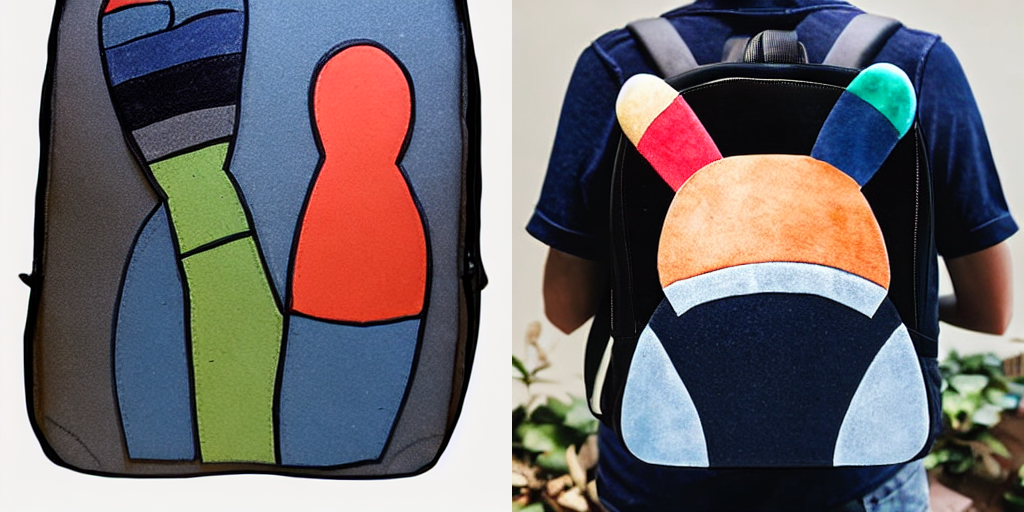

In [ ]:
prompt = "A <cat-toy> backpack"

num_samples = 2
num_rows = 1

# ÁµêÊûú„ÇíÂÜçÁèæ„Åß„Åç„Çã„Çà„ÅÜ„Å´‰π±Êï∞„ÅÆ seed „ÇíÂõ∫ÂÆö
generator = torch.Generator().manual_seed(42)

all_images = []
for _ in range(num_rows):
    images = pipe(
        prompt,
        num_images_per_prompt=num_samples,
        generator=generator,
        num_inference_steps=25,
    ).images
    all_images.extend(images)

image_grid(all_images, num_rows, num_samples)

In [ ]:
image_grid(images, rows=1, cols=len(images))

Output hidden; open in https://colab.research.google.com to view.

„É¢„Éá„É´„Å´‰∏é„Åà„Åü„Çè„Åö„Åã**Êï∞Êûö**„ÅÆÁîªÂÉè„Åã„Çâ„ÄÅ„Åù„ÅÆ„Ç≥„É≥„Çª„Éó„Éà„ÇíÊçâ„Åà„ÅüÁîªÂÉè„ÅåÁîüÊàê„Åß„Åç„Åæ„Åó„Åü„ÄÇ